In [1]:
#loading the housing dataset 
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
housing_data=pd.read_csv("https://raw.githubusercontent.com/cloudxlab/ml/master/machine_learning/datasets/housing/housing.csv")

In [2]:
#looking the dataset
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [12]:
#studying the data types of different columns
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [13]:
#looking for the descriptive measures of the data
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [3]:
#looking for the no of unique values in each column
housing_data.nunique()

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64

In [4]:
#figuring out if the data contains null values
housing_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
"""import numpy as np
median=housing_data['total_bedrooms'].median()
housing_data['total_bedrooms']= housing_data['total_bedrooms'].replace(np.nan, median)
"""

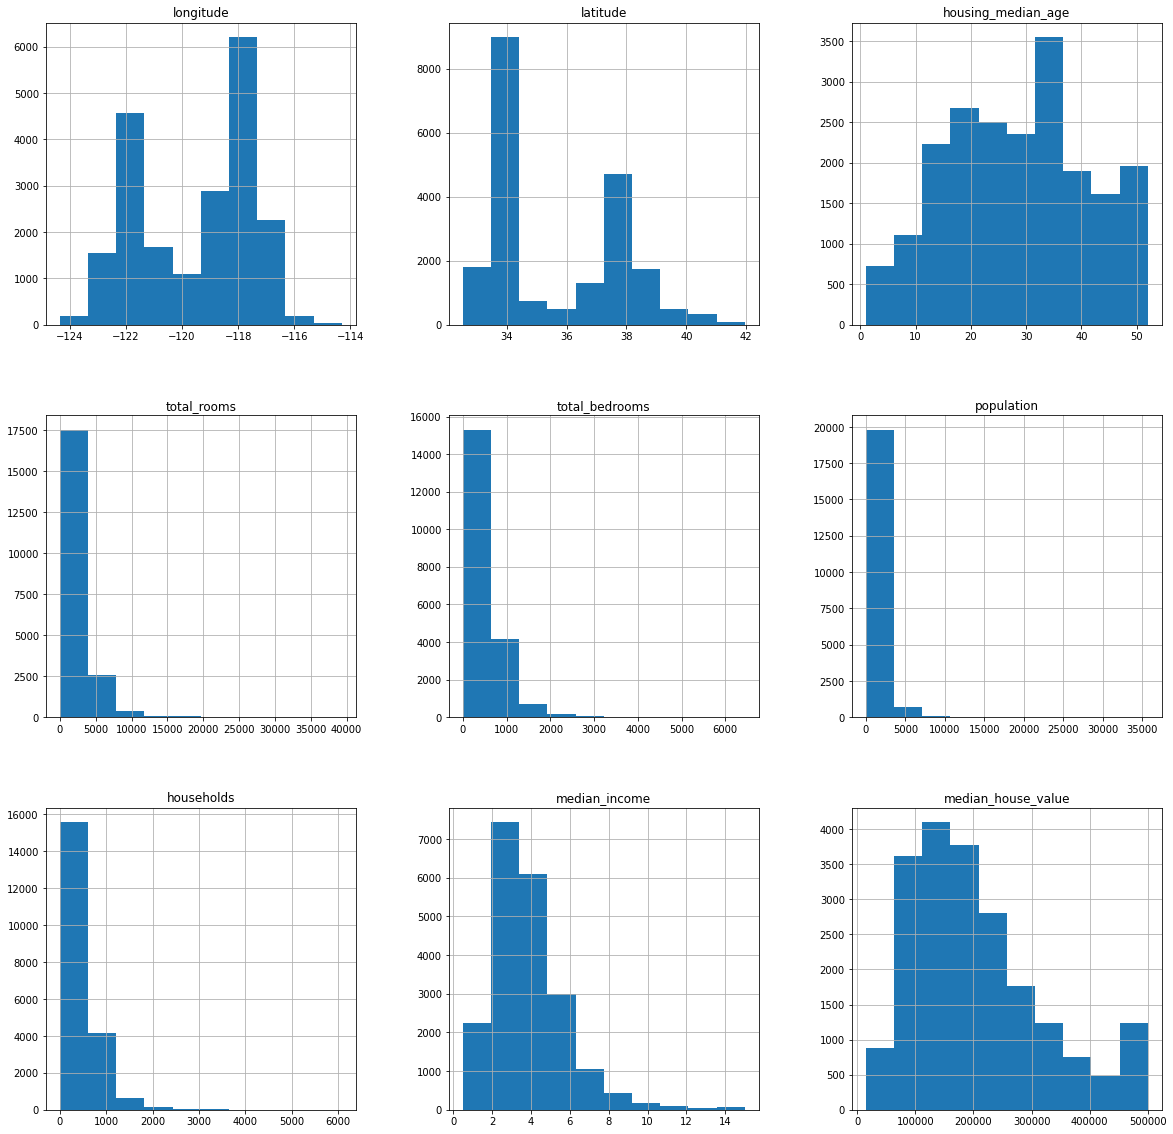

In [6]:
#plotting all the numerical columns histograms
housing_data.hist(figsize=(20,20))
plt.show()

In [8]:
housing_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

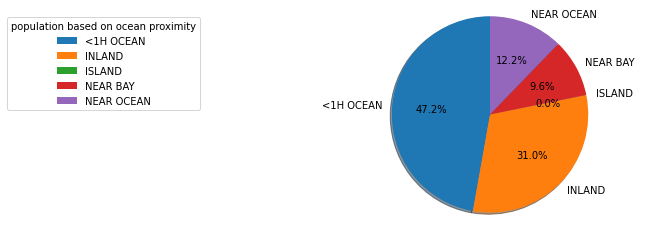

In [9]:
#studying the pattern based on population and ocean proximity
population_dict=dict(housing_data.groupby('ocean_proximity')['population'].sum())
plt.pie(list(population_dict.values()),labels=list(population_dict.keys()),shadow=True,startangle=90, radius=1.2,autopct='%1.1f%%')
plt.axis('equal')
plt.legend(title="population based on ocean proximity",loc='lower right',bbox_to_anchor=(-0.35, .5))
plt.show()

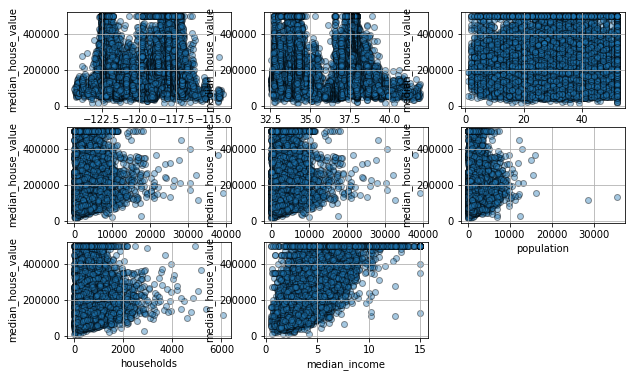

In [10]:
#visualising for dependency of independent variable on the dependent one

plt.rcParams["figure.figsize"] = (10,6)

plt.subplot(3,3,1)
plt.xlabel('longitude')
plt.ylabel('median_house_value')
plt.scatter(housing_data['longitude'],housing_data['median_house_value'],alpha=0.4, edgecolors='black')
plt.grid()

plt.subplot(3,3,2)
plt.xlabel('latitude')
plt.ylabel('median_house_value')
plt.scatter(housing_data['latitude'],housing_data['median_house_value'],alpha=0.4, edgecolors='black')
plt.grid()

plt.subplot(3,3,3)
plt.xlabel('housing_median_age')
plt.ylabel('median_house_value')
plt.scatter(housing_data['housing_median_age'],housing_data['median_house_value'],alpha=0.4, edgecolors='black')
plt.grid()

plt.subplot(3,3,4)
plt.xlabel('total_rooms')
plt.ylabel('median_house_value')
plt.scatter(housing_data['total_rooms'],housing_data['median_house_value'],alpha=0.4, edgecolors='black')
plt.grid()

plt.subplot(3,3,5)
plt.xlabel('total_bedrooms')
plt.ylabel('median_house_value')
plt.scatter(housing_data['total_rooms'],housing_data['median_house_value'],alpha=0.4, edgecolors='black')
plt.grid()

plt.subplot(3,3,6)
plt.xlabel('population')
plt.ylabel('median_house_value')
plt.scatter(housing_data['population'],housing_data['median_house_value'],alpha=0.4, edgecolors='black')
plt.grid()

plt.subplot(3,3,7)
plt.xlabel('households')
plt.ylabel('median_house_value')
plt.scatter(housing_data['households'],housing_data['median_house_value'],alpha=0.4, edgecolors='black')
plt.grid()


plt.subplot(3,3,8)
plt.xlabel('median_income')
plt.ylabel('median_house_value')
plt.scatter(housing_data['median_income'],housing_data['median_house_value'],alpha=0.4, edgecolors='black')
plt.grid()



plt.show()

array([[<AxesSubplot:xlabel='longitude', ylabel='longitude'>,
        <AxesSubplot:xlabel='latitude', ylabel='longitude'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='longitude'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='longitude'>,
        <AxesSubplot:xlabel='total_bedrooms', ylabel='longitude'>,
        <AxesSubplot:xlabel='population', ylabel='longitude'>,
        <AxesSubplot:xlabel='households', ylabel='longitude'>,
        <AxesSubplot:xlabel='median_income', ylabel='longitude'>,
        <AxesSubplot:xlabel='median_house_value', ylabel='longitude'>],
       [<AxesSubplot:xlabel='longitude', ylabel='latitude'>,
        <AxesSubplot:xlabel='latitude', ylabel='latitude'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='latitude'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='latitude'>,
        <AxesSubplot:xlabel='total_bedrooms', ylabel='latitude'>,
        <AxesSubplot:xlabel='population', ylabel='latitude'>,
        <AxesSubplot:xlabel='

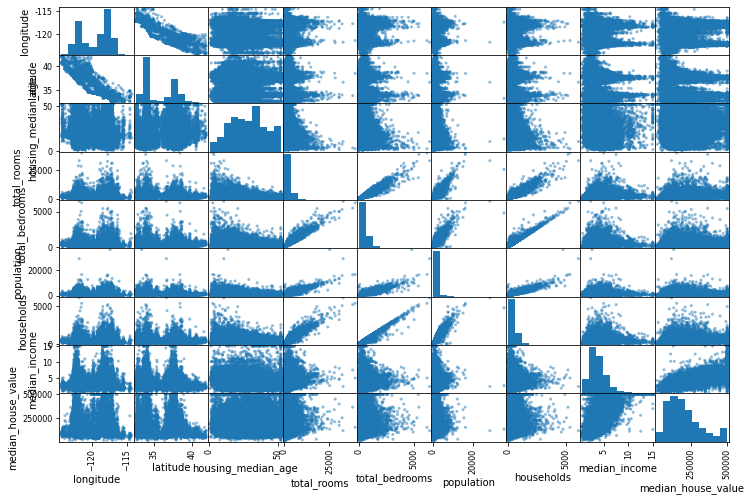

In [11]:
#visualising the different columns interrelation with each othere
from pandas.plotting import scatter_matrix

x = 0
attributes = []
for x in ['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value','ocean_proximity',]:
    attributes.append(x)
scatter_matrix(housing_data[attributes], figsize=(12, 8))